In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import path
import time 
from datetime import datetime 
import math

ModuleNotFoundError: No module named 'seaborn'

In [4]:
data_dir = path.join('..', 'data')
img_dir = path.join(data_dir, 'img')

dataset_file = 'reddit_wsb.csv'

In [5]:
data = pd.read_csv(path.join(data_dir, dataset_file))
data = data.sort_values(by=['timestamp'])
data

,title,score,id,url,comms_num,created,body,timestamp
32591,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,https://www.reddit.com/r/wallstreetbets/commen...,11,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56
257,An autists journey. $150 to $68k in one month....,50,l6h58v,https://www.reddit.com/gallery/l6h58v,8,1.611818e+09,NaN,2021-01-28 09:08:16
256,You all have made Melvin live up to its name,70,l6h59b,https://i.redd.it/59sk10r7iyd61.png,7,1.611818e+09,NaN,2021-01-28 09:08:17
255,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18
254,Highest SI % of Float End of Business Jan 27th...,26,l6h5am,https://www.reddit.com/r/wallstreetbets/commen...,22,1.611818e+09,Will Update Daily At Market Close\n\nTop 5 sec...,2021-01-28 09:08:19
...,...,...,...,...,...,...,...,...
36366,Absolute Hidden GEM $DVN.CN.... 💎💎💎,4,lvvwsj,https://www.reddit.com/r/wallstreetbets/commen...,14,1.614696e+09,Some further DD on this absolute hidden gem $D...,2021-03-02 16:46:07
36365,30k in F calls expiring Friday. The new DFV is...,3,lvvzzw,https://i.redd.it/b5m4oe1abkk61.png,1,1.614697e+09,NaN,2021-03-02 16:52:25
36364,What did one cunt say to the other cunt?,0,lvw227,https://www.reddit.com/r/wallstreetbets/commen...,0,1.614697e+09,So I’ve been pretty much a student to this WSB...,2021-03-02 16:56:18
36363,Can I use my 401k from Charles Schwab to inves...,1,lvw27y,https://www.reddit.com/r/wallstreetbets/commen...,0,1.614697e+09,Would I have to pull it out or choose an optio...,2021-03-02 16:56:35


# Encoding time attributes

In [4]:
def encode_time(timestamps):
    str_time = [x.split()[1] for x in timestamps]

    splited_time = [x.split(':') for x in str_time]
    float_time = [float(x[0] + '.' + x[1]) for x in splited_time]

    sin_time = [np.sin(2 * np.pi * x / 23.59) for x in float_time]
    cos_time = [np.cos(2 * np.pi * x / 23.59) for x in float_time]
    
    return sin_time, cos_time

In [5]:
sin_time, cos_time = encode_time(data.timestamp.values)
data['sin_time'] = sin_time
data['cos_time'] = cos_time

data

,title,score,id,url,comms_num,created,body,timestamp,sin_time,cos_time
32591,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,https://www.reddit.com/r/wallstreetbets/commen...,11,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56,0.796551,0.604571
257,An autists journey. $150 to $68k in one month....,50,l6h58v,https://www.reddit.com/gallery/l6h58v,8,1.611818e+09,NaN,2021-01-28 09:08:16,0.661741,-0.749732
256,You all have made Melvin live up to its name,70,l6h59b,https://i.redd.it/59sk10r7iyd61.png,7,1.611818e+09,NaN,2021-01-28 09:08:17,0.661741,-0.749732
255,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18,0.661741,-0.749732
254,Highest SI % of Float End of Business Jan 27th...,26,l6h5am,https://www.reddit.com/r/wallstreetbets/commen...,22,1.611818e+09,Will Update Daily At Market Close\n\nTop 5 sec...,2021-01-28 09:08:19,0.661741,-0.749732
...,...,...,...,...,...,...,...,...,...,...
36366,Absolute Hidden GEM $DVN.CN.... 💎💎💎,4,lvvwsj,https://www.reddit.com/r/wallstreetbets/commen...,14,1.614696e+09,Some further DD on this absolute hidden gem $D...,2021-03-02 16:46:07,-0.946600,-0.322411
36365,30k in F calls expiring Friday. The new DFV is...,3,lvvzzw,https://i.redd.it/b5m4oe1abkk61.png,1,1.614697e+09,NaN,2021-03-02 16:52:25,-0.951631,-0.307243
36364,What did one cunt say to the other cunt?,0,lvw227,https://www.reddit.com/r/wallstreetbets/commen...,0,1.614697e+09,So I’ve been pretty much a student to this WSB...,2021-03-02 16:56:18,-0.954850,-0.297087
36363,Can I use my 401k from Charles Schwab to inves...,1,lvw27y,https://www.reddit.com/r/wallstreetbets/commen...,0,1.614697e+09,Would I have to pull it out or choose an optio...,2021-03-02 16:56:35,-0.954850,-0.297087


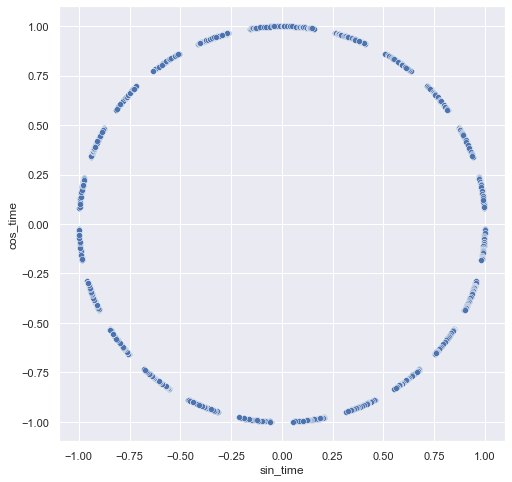

In [6]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(data=data, x='sin_time', y='cos_time')

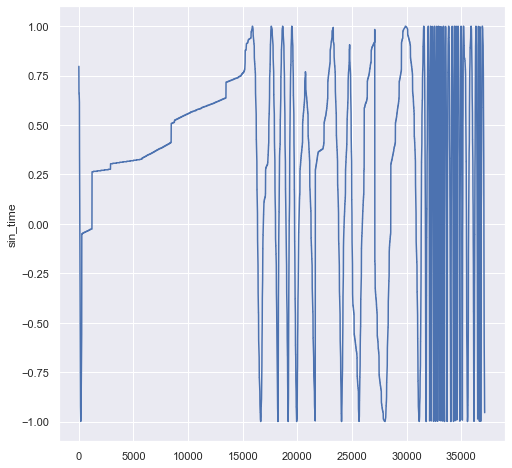

In [7]:
sns.lineplot(data=data, x=range(0, data.shape[0]), y='sin_time')

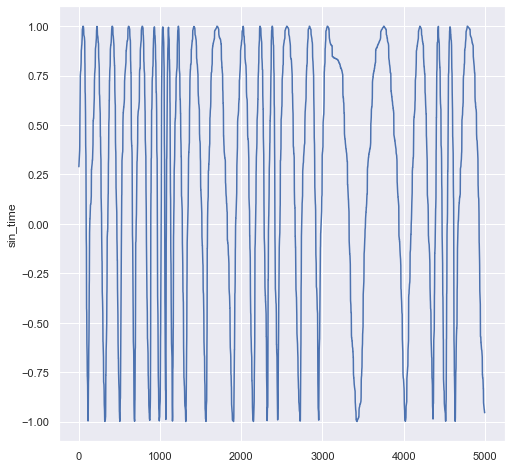

In [8]:
sns.lineplot(data=data.iloc[-5000:-1], x=range(1, 5000), y='sin_time')

In [9]:
def encode_date(unix_timestamps):
    days_of_year = [time.localtime(x).tm_yday for x in unix_timestamps]
    
    sin_date = [np.sin(2 * np.pi * x / 365.0) for x in days_of_year]
    cos_date = [np.cos(2 * np.pi * x / 365.0) for x in days_of_year]
    
    return sin_date, cos_date

In [10]:
sin_date, cos_date = encode_date(data.created.values)

data['sin_date'] = sin_date
data['cos_date'] = cos_date

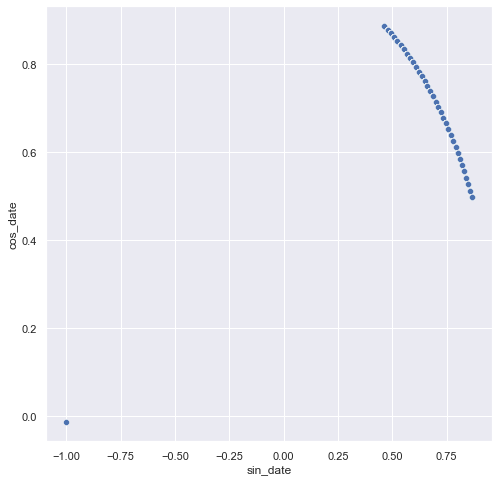

In [11]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(data=data, x='sin_date', y='cos_date')

# Preliminary statistics

## Posts per day

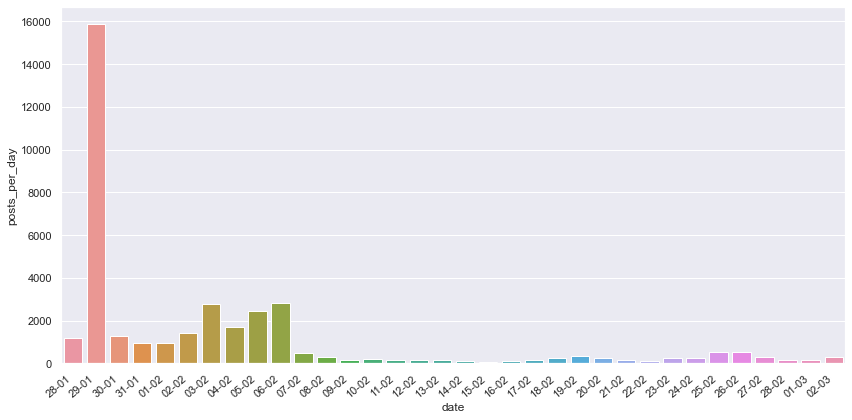

In [67]:
def plot_posts_per_day(unix_timestamps):
    days_of_year = [time.localtime(x).tm_yday for x in unix_timestamps]
    
    temp_df = pd.DataFrame(days_of_year)
    vc = temp_df.iloc[:, 0].value_counts()
    
    derp = pd.DataFrame()
    derp['date'] = vc.index
    derp['posts_per_day'] = vc.values
    
    derp = derp.sort_values(by=['date'])
    derp.date = derp.date.apply(lambda x: datetime.strptime(str(x), "%j").strftime("%d-%m"))
    
    sns.set(rc={'figure.figsize':(12,6)})
    ax = sns.barplot(x=derp.date, y=derp.posts_per_day)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.tight_layout()
    plt.show()
    
plot_posts_per_day(data.created[1:-2].values)

## Words per title

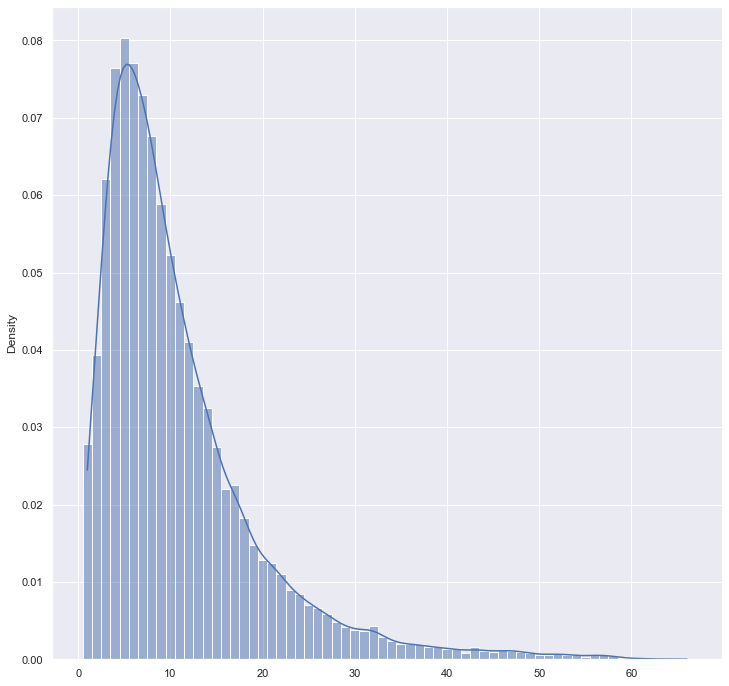

In [84]:
def plot_words_in_titles(titles):
    len_words = [len(title.split()) for title in titles]
    
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.histplot(x=len_words, discrete=True, kde=True, ax=ax, stat='density')
    
plot_words_in_titles(data.title.values)

## Words per body

In [10]:
def plot_words_in_bodies(bodies, skip_empty=False):
    len_words = [len(str(body).split()) if str(body) != 'nan' else 0 for body in bodies]
    
    df = pd.DataFrame(len_words, columns=['a'])
    filtered = df[df.a < df.a.quantile(.95)]
    
    if skip_empty:
        filtered = filtered[filtered.a > 0]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.histplot(x=filtered.a, bins=35, ax=ax, stat='density')
    

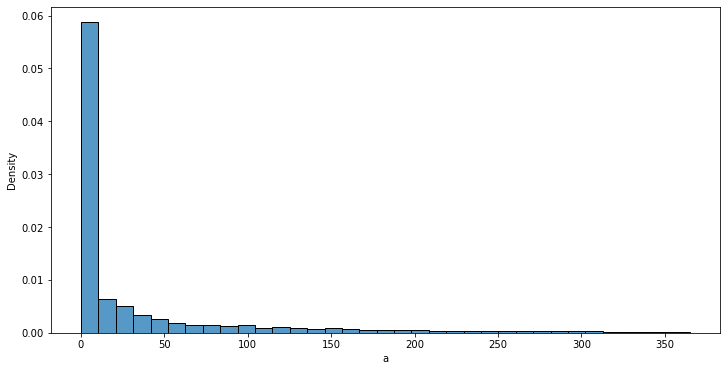

In [6]:
plot_words_in_bodies(data.body.values)

### Words per body without empty bodies

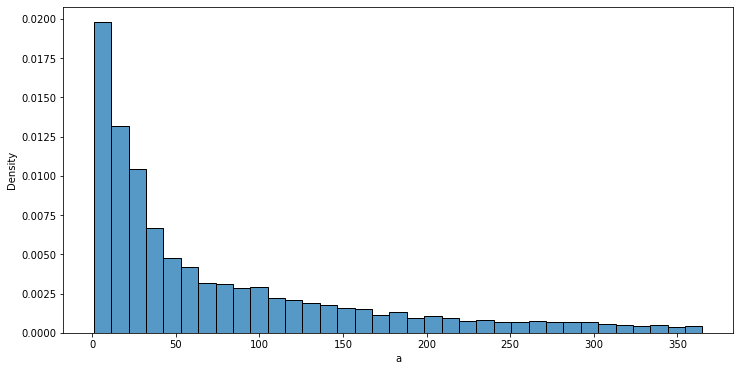

In [11]:
plot_words_in_bodies(data.body.values, True)

## Most popular post hours

In [12]:
def plot_post_hour(unix_timestamps):
    hours = [time.localtime(x).tm_hour for x in unix_timestamps]
    
    sns.histplot(x=hours, discrete=True, stat='density', kde=True)
    

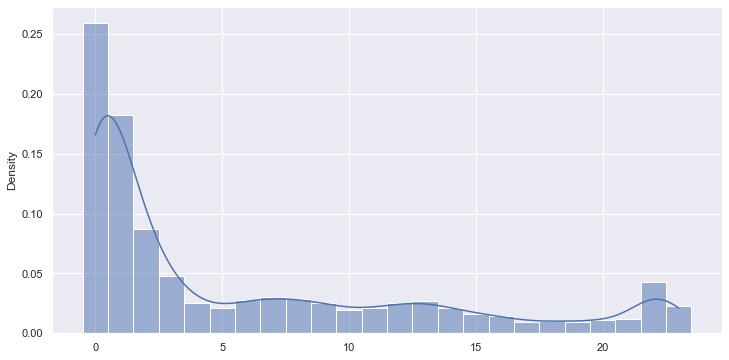

In [14]:
# sns.set(rc={'figure.figsize':(12,6)})
plot_post_hour(data.created.values)

### Most popular post hours after two days

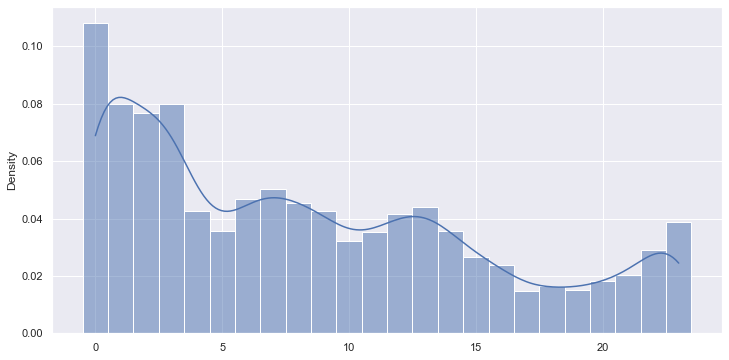

In [15]:
plot_post_hour(data.created.values[15000:])